In [1]:
import numpy as np
import pandas as pd

import os

In [2]:
os.getcwd()

'/Users/aishwaryajayanth/Downloads/Aalen/DL/Examples/uk_utils'

In [3]:
data = pd.read_csv('/Users/aishwaryajayanth/Downloads/Aalen/DL/Dataset/my/archive/Admission_Predictt.csv')

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.shape

(500, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
data.duplicated().sum()

0

In [8]:
data.drop(columns=['Serial No.'],inplace=True)

In [9]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [10]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [11]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [14]:
y_test

304    0.62
340    0.75
47     0.89
67     0.57
479    0.79
       ... 
11     0.84
192    0.86
92     0.34
221    0.75
110    0.61
Name: Chance of Admit , Length: 100, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [17]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

Init Plugin
Init Graph Optimizer
Init Kernel


In [18]:
# Architecture of neural network
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

Metal device set to: Apple M1


2022-05-01 20:42:33.380168: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-01 20:42:33.380256: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model 
model.compile(loss='mean_squared_error',optimizer='Adam')


In [21]:
plot_history= model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100


2022-05-01 20:42:34.182196: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-01 20:42:34.182399: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-01 20:42:40.410505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 8s 26ms/step - loss: 0.3763 - val_loss: 0.3641
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3162 - val_loss: 0.3019
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2629 - val_loss: 0.2472
Epoch 4/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.2045

2022-05-01 20:42:42.394056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 5ms/step - loss: 0.2025 - val_loss: 0.1994
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1629 - val_loss: 0.1533
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1244 - val_loss: 0.1091
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0857 - val_loss: 0.0713
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0544 - val_loss: 0.0497
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0385 - val_loss: 0.0406
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0344 - val_loss: 0.0356
Epoch 11/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0317 - val_loss: 0.0318
Epoch 12/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0284 - val_loss: 0.0283
Epoch 13/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0265 - val_loss: 0.0249
Epoch 14/100
10/10

10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.0049
Epoch 87/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 88/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 89/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 90/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.0048
Epoch 91/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 92/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 93/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 94/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.0048
Epoch 95/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - val_loss: 0.0048
Epoch 96/100


In [22]:
y_pred = model.predict(X_test_scaled)

2022-05-01 20:42:47.154344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [23]:
from sklearn.metrics import r2_score #r2  (coefficient of determination) regression score function.
r2_score(y_test,y_pred)

0.7752478911680655

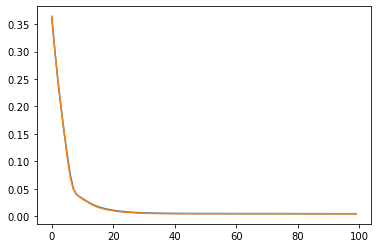

In [25]:
import matplotlib.pyplot as plt
plt.plot(plot_history.history['loss'])
plt.plot(plot_history.history['val_loss'])